In [1]:
# Notes cell:

# written by Henry James - hj238@kent.ac.uk
# data source: https://ourworldindata.org/internet

In [2]:
# Import cell

import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(style="darkgrid")

In [3]:
# loading all the data frames

dfLocation = "../../5. Actual Data/Our World in Data/Energy/energy.xlsx"

# df with the energy usage of each country
dfEnergy = pd.read_excel(dfLocation)

# df with number of broadband subscriptions per 100 people
dfBroadband = pd.read_excel("../../5. Actual Data/Our World in Data/Internet/broadband-penetration-by-country.xlsx")

# df with number of mobile subscriptions per 100 people
dfMobile = pd.read_excel("../../5. Actual Data/Our World in Data/Internet/mobile-cellular-subscriptions-per-100-people.xlsx")

# df with the number of people per country with an internet connection
dfInternetUsers = pd.read_excel("../../5. Actual Data/Our World in Data/Internet/share-of-individuals-using-the-internet.xlsx")

# df with the number of users in the United States with specific technologies
dfTechUseUS = pd.read_excel("../../5. Actual Data/Our World in Data/Internet/technology-adoption-by-households-in-the-united-states.xlsx")

# df with the number of users for each major social media platform
dfSocialMediaUsers = pd.read_excel("../../5. Actual Data/Our World in Data/Internet/users-by-social-media-platform.xlsx")

In [4]:
# dfEnergy.head()

In [5]:
dfEnergy_groupByYear = dfEnergy.loc[:, ['Entity', 'Year', 'Primary energy consumption (TWh)']].groupby('Year')
dfEnergy_groupByYear_avg = dfEnergy_groupByYear.mean()



In [6]:
# dfEnergy_groupByYear.head()

In [7]:
dfEnergy_groupByYear_avg.head()

# adds all of the years into an array
dfEnergy_years = []
i = 1965
for x in dfEnergy_groupByYear:
    dfEnergy_years.append(i)
    i = i + 1

In [8]:
# dfEnergy_groupByYear_avg['Primary energy consumption (TWh)']

In [9]:
# print(dfEnergy_years)

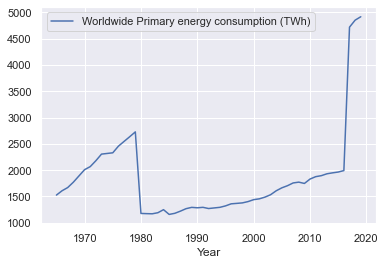

In [10]:
# creates a Pandas dataframe with the years and energy usage
dfEnergy_pddf = pd.DataFrame({"Year": dfEnergy_years, "Energy": dfEnergy_groupByYear_avg['Primary energy consumption (TWh)']})

ax = dfEnergy_pddf.plot(kind='line', x='Year', y='Energy', label='Worldwide Primary energy consumption (TWh)')

# What caused this strange look?
#   Many countries not recording befor 1980?
#   What caused the sudden spike in 2019?
#     Some countries not giving their energy consumption so dragging the average?

In [11]:
# len(dfEnergy.loc[dfEnergy['Year'] == 1965])

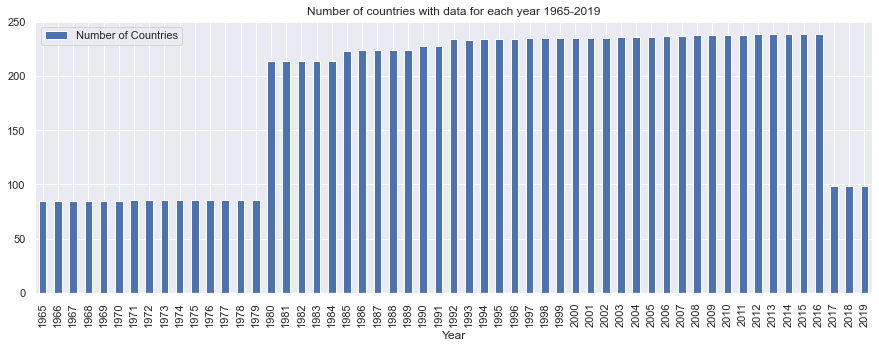

In [12]:
# adds the number of countries for each year
dfEnergyCount = []
i = 1965
for x in dfEnergy_years:
    dfEnergyCount.append(len(dfEnergy.loc[dfEnergy['Year'] == i]))
    i = i + 1

dfEnergyCount_pddf = pd.DataFrame({"Year": dfEnergy_years, "Count": dfEnergyCount})

# looks like the strange shape is caused by havving lots of countries for some years and very few for others
ax = dfEnergyCount_pddf.plot(kind='bar', x='Year', y='Count', title='Number of countries with data for each year 1965-2019', label='Number of Countries', figsize=(15,5))

In [13]:
# amount of years that each country 

# remove countries that havent submitted many years

In [14]:
# creates a new array with only the energy values from 1980 to 2016
# dfEnergy_groupByYear_avg_shortened = []
dfEnergy_years_shortened = dfEnergy_years.copy()

dfEnergy_groupByYear_avg_shortened = dfEnergy_groupByYear_avg.copy()

# removes years 1965-1979 and 2017-2019 because the number of countries is too low
i = 1965
for x in dfEnergy_years:
    # print(i)
    # if i >= 1980 and i <= 2016:
    if i < 1980 or i > 2016:
        dfEnergy_years_shortened.remove(i)
        # dfEnergy_groupByYear_avg_shortened.append(dfEnergy_groupByYear_avg.loc[i])#
        dfEnergy_groupByYear_avg_shortened = dfEnergy_groupByYear_avg_shortened.drop(i)
    i = i + 1
    
#dfEnergy_groupByYear_avg_shortened = dfEnergy_groupByYear_avg.copy()
#dfEnergy_groupByYear_avg_shortened.drop(2016)

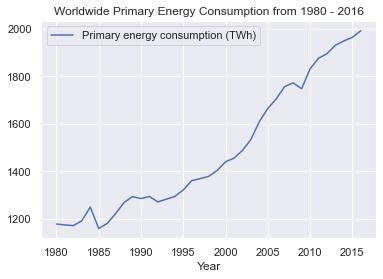

In [15]:
dfEnergy_shortened_pddf = pd.DataFrame({"Year": dfEnergy_years_shortened, "Energy": dfEnergy_groupByYear_avg_shortened['Primary energy consumption (TWh)']})

ax = dfEnergy_shortened_pddf.plot(kind='line', x='Year', y='Energy', title='Worldwide Primary Energy Consumption from 1980 - 2016', label='Primary energy consumption (TWh)')


In [16]:
# dfSocialMediaUsers.head()
# df_uk = df[0].loc[df[0]['Country Name'] == 'United Kingdom'].copy()


# creates a new array with just the Facebook data
df_facebook = dfSocialMediaUsers.loc[dfSocialMediaUsers['Entity'] == 'Facebook'].copy()
# dfSocialMediaUsers_pddf = pd.DataFrame({"Site": dfSocialMediaUsers['Entity']})

# creates a Pandas dataframe of the facebook data
df_facebook_pddf = pd.DataFrame({"Year": df_facebook['Year'], "Users": df_facebook['Monthly active users (Statista and TNW (2019))']})

# Plots the facebook data onto a line graph
ax = df_facebook_pddf.plot(kind='line', x='Year', y='Users', title='Monthly Active Users of Facebook', label='Users (billions)')
# Note that it converts the values because it is so large

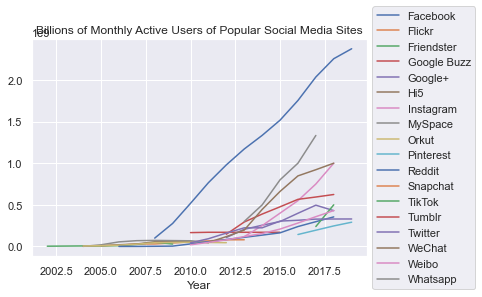

In [17]:
# print(df_facebook_pddf['Users'])

# imports a counter so I can see how many social media sites there are 
from collections import Counter
socialMediaSites = Counter(dfSocialMediaUsers['Entity']).keys()

# converts the dict object into a list
socialMediaSites = list(socialMediaSites)

temp_site_name = socialMediaSites[0]
df_temp_site = dfSocialMediaUsers.loc[dfSocialMediaUsers['Entity'] == temp_site_name].copy()
ax = df_facebook_pddf.plot(kind='line', x='Year', y='Users', title='Billions of Monthly Active Users of Popular Social Media Sites', label='Facebook')


i = 1
for x in socialMediaSites:
    if i < len(socialMediaSites) - 1:
        temp_site_name = socialMediaSites[i]
        df_temp_site = dfSocialMediaUsers.loc[dfSocialMediaUsers['Entity'] == temp_site_name].copy()
        temp_site_pddf = pd.DataFrame({"Year": df_temp_site['Year'], "Users": df_temp_site['Monthly active users (Statista and TNW (2019))']})
        temp_site_pddf.plot(ax = ax, kind='line', x='Year', y='Users', label=temp_site_name).legend(loc="center left", bbox_to_anchor=(1.0, 0.5))

    i = i + 1
    

In [18]:
# socialMediaSites[0]

In [19]:
dfBroadband_groupByYear = dfBroadband.loc[:, ['Entity', 'Year', 'Fixed broadband subscriptions (per 100 people)']].groupby('Year')
dfBroadband_groupByYear_avg = dfBroadband_groupByYear.mean()

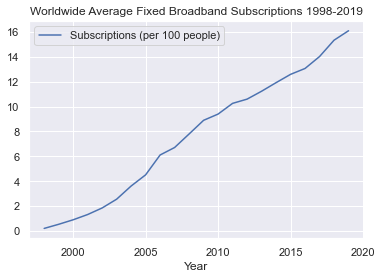

In [20]:
dfBroadband_years = list(dfBroadband_groupByYear_avg.index)

dfBroadband_pddf = pd.DataFrame({"Year": dfBroadband_years, "Subscriptions": dfBroadband_groupByYear_avg['Fixed broadband subscriptions (per 100 people)']})

ax = dfBroadband_pddf.plot(kind='line', x='Year', y='Subscriptions', title='Worldwide Average Fixed Broadband Subscriptions 1998-2019', label='Subscriptions (per 100 people)')


In [21]:
# dfBroadband_groupByYear_avg['Fixed broadband subscriptions (per 100 people)']

In [22]:
# df with the entity, monthly users and energy use from 2011 - 2019
dfSocialMediaEnergy = pd.read_excel("../../5. Actual Data/Statistica/SocialMediaEnergyUse.xlsx")

# df_facebook_year = dfSocialMediaEnergy_pddf.loc[dfSocialMediaEnergy_pddf['Year'] == 2011]['Energy TWh']
dfSocialMediaEnergyFB = dfSocialMediaEnergy.loc[dfSocialMediaEnergy['Entity'] == 'Facebook']

dfSocialMediaEnergy_FB_pddf = pd.DataFrame({"Year": dfSocialMediaEnergyFB['Year'], "Entity": dfSocialMediaEnergyFB['Entity'], "Users": dfSocialMediaEnergyFB['Monthly Active Users'], "Energy GWh": dfSocialMediaEnergyFB['Electricity Use in GWh'], "Energy TWh": dfSocialMediaEnergyFB['Electricity Use in TWh']})

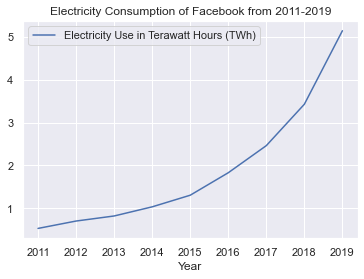

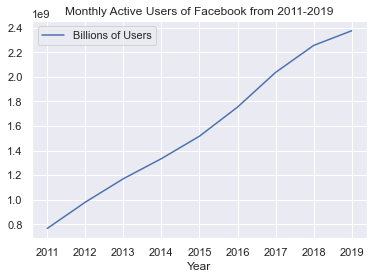

In [23]:
ax = dfSocialMediaEnergy_FB_pddf.plot(kind='line', x='Year', y='Energy TWh', title='Electricity Consumption of Facebook from 2011-2019', label='Electricity Use in Terawatt Hours (TWh)')
ax = dfSocialMediaEnergy_FB_pddf.plot(kind='line', x='Year', y='Users', title='Monthly Active Users of Facebook from 2011-2019', label='Billions of Users')


In [24]:
energyPerUser2019 = dfSocialMediaEnergy_FB_pddf.loc[dfSocialMediaEnergy_FB_pddf['Year'] == 2019]['Energy GWh']
users2019 = dfSocialMediaEnergy_FB_pddf.loc[dfSocialMediaEnergy_FB_pddf['Year'] == 2019]['Users']

# This is the amount of energy facebook uses per user in Gigawatt Hours in 2019
energyPerUser2019GW = energyPerUser2019 / users2019

# This is the amount of energy facebook uses per user in Watt Hours in 2019
energyPerUser2019W = energyPerUser2019GW * 1e+9


In [25]:
# print(energyPerUser2019)
# print(users2019)

# print(energyPerUser2019GW) 
# print(energyPerUser2019W)

In [26]:
energyPerUserW = []

# a for loop which calculates the energy use per user in Watt hours
i = 0
for x in range(len(dfSocialMediaEnergyFB)):
    electUse = dfSocialMediaEnergyFB.loc[i]['Electricity Use in GWh']
    users = dfSocialMediaEnergyFB.loc[i]['Monthly Active Users']
    # electUsePer = 0
    electUsePer = (electUse / users) * 1e+9
    energyPerUserW.append(electUsePer)
    # energyPerUserW[i] = electUsePer
    # print(energyPerUserW)
    i = i + 1

dfSocialMediaEnergy_FB_pddf = pd.DataFrame({"Year": dfSocialMediaEnergyFB['Year'], "Entity": dfSocialMediaEnergyFB['Entity'], "Users": dfSocialMediaEnergyFB['Monthly Active Users'], "Energy GWh": dfSocialMediaEnergyFB['Electricity Use in GWh'], "Energy TWh": dfSocialMediaEnergyFB['Electricity Use in TWh'], "Energy per user": energyPerUserW})

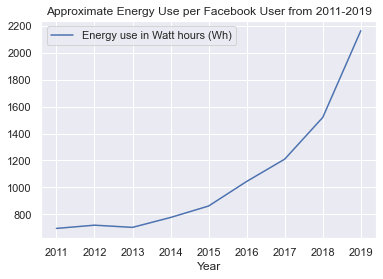

In [27]:
ax = dfSocialMediaEnergy_FB_pddf.plot(kind='line', x='Year', y='Energy per user', title='Approximate Energy Use per Facebook User from 2011-2019', label='Energy use in Watt hours (Wh)')


In [28]:
dfEnergy_years_comp_to_FB = dfEnergy_years.copy()

dfEnergy_groupByYear_avg_comp_to_FB = dfEnergy_groupByYear_avg.copy()

# removes all values except 2011 - 2016
i = 1965
for x in range(len(dfEnergy_years_comp_to_FB)):
    # print(i)
    # if i >= 1980 and i <= 2016:
    if i < 2011 or i > 2016:
        dfEnergy_years_comp_to_FB.remove(i)
        # dfEnergy_groupByYear_avg_shortened.append(dfEnergy_groupByYear_avg.loc[i])#
        dfEnergy_groupByYear_avg_comp_to_FB = dfEnergy_groupByYear_avg_comp_to_FB.drop(i)
    i = i + 1

# values for 2017-2019 are erroneous as the number of countries included are much higher than before 2016

In [29]:
# i = 0
# for x in range(len(dfEnergy_groupByYear_avg_comp_to_FB)):
#     temp = dfEnergy_groupByYear_avg_comp_to_FB.iloc[i]
#     dfEnergy_groupByYear_avg_comp_to_FB.iloc[i] = temp * 1000
#     i = i + 1

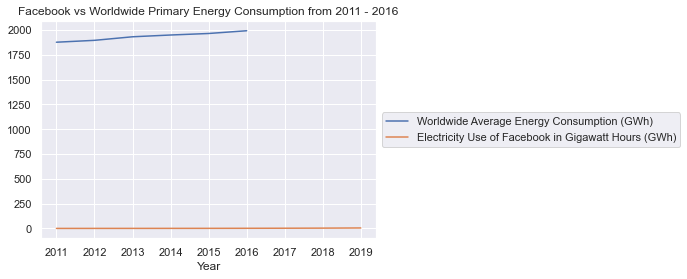

In [30]:
dfEnergy_years_comp_to_FB_pddf = pd.DataFrame({"Year": dfEnergy_years_comp_to_FB, "Energy": dfEnergy_groupByYear_avg_comp_to_FB['Primary energy consumption (TWh)']})

ax = dfEnergy_years_comp_to_FB_pddf.plot(kind='line', x='Year', y='Energy', title='Facebook vs Worldwide Primary Energy Consumption from 2011 - 2016', label='Worldwide Average Energy Consumption (GWh)')
dfSocialMediaEnergy_FB_pddf.plot(ax = ax, kind='line', x='Year', y='Energy TWh', label='Electricity Use of Facebook in Gigawatt Hours (GWh)').legend(loc="center left", bbox_to_anchor=(1.0, 0.5))


In [31]:
dfSocialMediaEnergy_FB_short_pddf = dfSocialMediaEnergy_FB_pddf.copy()

# dfSocialMediaEnergy_short_pddf.drop

In [32]:
# finds all rows above 2016 and adds the index to an array
indexes_to_remove = []
i = 2011
index = 0
for x in range(len(dfSocialMediaEnergy_FB_short_pddf)):
    if i > 2016:
        indexes_to_remove.append(index)
    i = i + 1
    index = index + 1

# removes all rows where the year is above 2016
i = 0
for x in range(len(indexes_to_remove)):
    dfSocialMediaEnergy_FB_short_pddf = dfSocialMediaEnergy_FB_short_pddf.drop(indexes_to_remove[i])
    i = i + 1

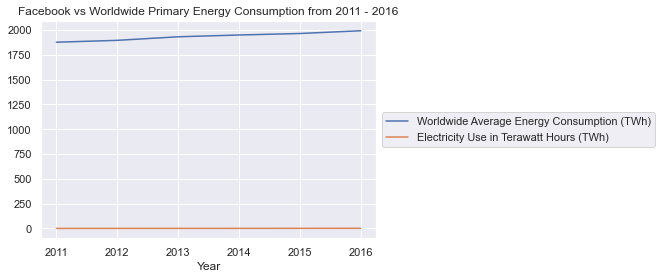

In [33]:
ax = dfEnergy_years_comp_to_FB_pddf.plot(kind='line', x='Year', y='Energy', title='Facebook vs Worldwide Primary Energy Consumption from 2011 - 2016', label='Worldwide Average Energy Consumption (TWh)')
dfSocialMediaEnergy_FB_short_pddf.plot(ax = ax, kind='line', x='Year', y='Energy TWh', label='Electricity Use in Terawatt Hours (TWh)').legend(loc="center left", bbox_to_anchor=(1.0, 0.5))


In [34]:
# add the highest, lowest, US and UK to this graph
df_uk = dfEnergy.loc[dfEnergy['Entity'] == 'United Kingdom'].copy()
df_us = dfEnergy.loc[dfEnergy['Entity'] == 'United States'].copy()
df_mkd = dfEnergy.loc[dfEnergy['Entity'] == 'North Macedonia'].copy()

In [35]:
# dfEnergy
# df_us
# df_mkd

In [36]:
df_uk_comp_to_FB = df_uk.copy()

# removes all rows before 2011 or after 2016
indexes_to_remove = []
i = 1965
# sets index to the first 'United Kingdom' row
index = df_uk_comp_to_FB.index[0]
for x in range(len(df_uk_comp_to_FB)):
    if i < 2011:
        indexes_to_remove.append(index)
    if i > 2016:
        indexes_to_remove.append(index)
    i = i + 1
    index = index + 1

i = 0
for x in range(len(indexes_to_remove)):
    df_uk_comp_to_FB = df_uk_comp_to_FB.drop(indexes_to_remove[i])
    i = i + 1
    
##############################

df_us_comp_to_FB = df_us.copy()

# removes all rows before 2011 or after 2016
indexes_to_remove = []
i = 1965
# sets index to the first 'United Kingdom' row
index = df_us_comp_to_FB.index[0]
for x in range(len(df_us_comp_to_FB)):
    if i < 2011:
        indexes_to_remove.append(index)
    if i > 2016:
        indexes_to_remove.append(index)
    i = i + 1
    index = index + 1

i = 0
for x in range(len(indexes_to_remove)):
    df_us_comp_to_FB = df_us_comp_to_FB.drop(indexes_to_remove[i])
    i = i + 1

    
#################################

df_mkd_comp_to_FB = df_mkd.copy()

# removes all rows before 2011 or after 2016
indexes_to_remove = []
i = 1990
# sets index to the first 'United Kingdom' row
index = df_mkd_comp_to_FB.index[0]
for x in range(len(df_mkd_comp_to_FB)):
    if i < 2011:
        indexes_to_remove.append(index)
    if i > 2016:
        indexes_to_remove.append(index)
    i = i + 1
    index = index + 1

i = 0
for x in range(len(indexes_to_remove)):
    df_mkd_comp_to_FB = df_mkd_comp_to_FB.drop(indexes_to_remove[i])
    i = i + 1

In [37]:
# indexes_to_remove

df_uk_comp_to_FB_pddf = pd.DataFrame({"Year": dfEnergy_years_comp_to_FB, "Energy": df_uk_comp_to_FB['Primary energy consumption (TWh)']})
df_us_comp_to_FB_pddf = pd.DataFrame({"Year": dfEnergy_years_comp_to_FB, "Energy": df_us_comp_to_FB['Primary energy consumption (TWh)']})
df_mkd_comp_to_FB_pddf = pd.DataFrame({"Year": dfEnergy_years_comp_to_FB, "Energy": df_mkd_comp_to_FB['Primary energy consumption (TWh)']})

In [38]:
#df_uk_comp_to_FB.index
df_uk_comp_to_FB_pddf

Year    Energy
9507  2011  2347.197
9508  2012  2376.004
9509  2013  2364.442
9510  2014  2227.917
9511  2015  2252.941
9512  2016  2226.110

In [39]:
dfEnergy_years_comp_to_FB_pddf

Year       Energy
Year                   
2011  2011  1876.572324
2012  2012  1895.473444
2013  2013  1931.305464
2014  2014  1949.181975
2015  2015  1964.452766
2016  2016  1992.151808

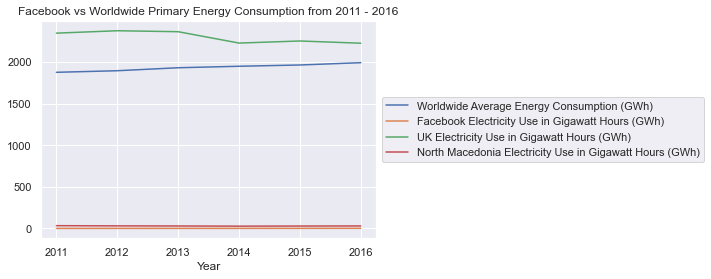

In [40]:
ax = dfEnergy_years_comp_to_FB_pddf.plot(kind='line', x='Year', y='Energy', title='Facebook vs Worldwide Primary Energy Consumption from 2011 - 2016', label='Worldwide Average Energy Consumption (GWh)')
dfSocialMediaEnergy_FB_short_pddf.plot(ax = ax, kind='line', x='Year', y='Energy TWh', label='Facebook Electricity Use in Gigawatt Hours (GWh)')
df_uk_comp_to_FB_pddf.plot(ax = ax, kind='line', x='Year', y='Energy', label='UK Electricity Use in Gigawatt Hours (GWh)')
# df_us_comp_to_FB_pddf.plot(ax = ax, kind='line', x='Year', y='Energy', label='US Electricity Use in Gigawatt Hours (GWh)')
df_mkd_comp_to_FB_pddf.plot(ax = ax, kind='line', x='Year', y='Energy', label='North Macedonia Electricity Use in Gigawatt Hours (GWh)').legend(loc="center left", bbox_to_anchor=(1.0, 0.5))


In [41]:
dfEnergy_years_comp_to_FB_pddf

Year       Energy
Year                   
2011  2011  1876.572324
2012  2012  1895.473444
2013  2013  1931.305464
2014  2014  1949.181975
2015  2015  1964.452766
2016  2016  1992.151808

In [42]:
# creates a dataframe with all of the 2019 values
df_2019 = dfEnergy.loc[dfEnergy['Year'] == 2019].copy()
df_2019

Entity      Code  Year  Primary energy consumption (TWh)
91             Africa       NaN  2019                          5519.688
183           Algeria       DZA  2019                           705.040
349         Argentina       ARG  2019                           961.881
460      Asia Pacific       NaN  2019                         71544.479
515         Australia       AUS  2019                          1780.442
...               ...       ...   ...                               ...
9716       Uzbekistan       UZB  2019                           495.469
9808        Venezuela       VEN  2019                           618.567
9863          Vietnam       VNM  2019                          1144.207
9918   Western Africa       NaN  2019                           721.085
10010           World  OWID_WRL  2019                        162194.290

[99 rows x 4 columns]

In [43]:
min(df_2019['Primary energy consumption (TWh)'])

# finds the country with the lowest energy consumption in TWh
temp = dfEnergy.loc[dfEnergy['Primary energy consumption (TWh)'] == 31.077].copy()
temp

Entity Code  Year  Primary energy consumption (TWh)
6453  North Macedonia  MKD  2019                            31.077

In [44]:
# turns this dataframe into a Pandas DataFrame and finds the lowest energy consumption - 31.077 TWh
# df_2019_pddf = pd.DataFrame({"Entity": df_2019['Entity'], "Energy": df_2019['Primary energy consumption (TWh)']})
# df_2019_pddf.min()

In [45]:
dfSocialMediaEnergy_FB_pddf

Year    Entity         Users  Energy GWh  Energy TWh  Energy per user
0  2011  Facebook  7.660000e+08       532.0       0.532       694.516971
1  2012  Facebook  9.797500e+08       704.0       0.704       718.550651
2  2013  Facebook  1.170500e+09       822.0       0.822       702.263990
3  2014  Facebook  1.334000e+09      1035.0       1.035       775.862069
4  2015  Facebook  1.516750e+09      1306.0       1.306       861.051591
5  2016  Facebook  1.753500e+09      1830.0       1.830      1043.627032
6  2017  Facebook  2.035750e+09      2462.0       2.462      1209.382292
7  2018  Facebook  2.255250e+09      3427.0       3.427      1519.565458
8  2019  Facebook  2.375000e+09      5140.0       5.140      2164.210526

In [46]:
# df_2019 = dfEnergy.loc[dfEnergy['Year'] == 2019].copy()

# users2019 = dfSocialMediaEnergy_pddf.loc[dfSocialMediaEnergy_pddf['Year'] == 2019]['Users']
year = 2011
count = []
# for x in range(len(dfSocialMediaEnergy_pddf)):
#    
#     if year < 2012:
#         # sets df_facebook_year to the energy used by Facebook in that year in GWh
#         df_facebook_year = dfSocialMediaEnergy_pddf.loc[dfSocialMediaEnergy_pddf['Year'] == year]['Energy']
#         print(df_facebook_year)
        
#         # sets df_year to all values from that year
#         df_year = dfEnergy.loc[dfEnergy['Year'] == year].copy()
        # print(df_year)
#         df_year_low_energy = df_year.loc[df_year['Primary energy consumption (TWh)'] < df_facebook_year[0]].copy()
#         count.append(len(df_year_low_energy))
    
#     year = year + 1

# doesnt work. Could do it manually...

# df_temp
# len(dfSocialMediaEnergy_pddf)

#df_year_low_energy

# df_facebook_year

In [47]:
# grabs the energy use of Facebook
df_facebook_year = dfSocialMediaEnergy_FB_pddf.loc[dfSocialMediaEnergy_FB_pddf['Year'] == 2011]['Energy TWh']
df_facebook_year[0]

0.532

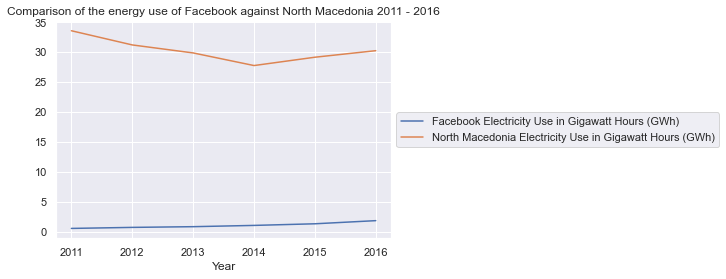

In [48]:
ax = dfSocialMediaEnergy_FB_short_pddf.plot(kind='line', x='Year', y='Energy TWh', title='Comparison of the energy use of Facebook against North Macedonia 2011 - 2016', label='Facebook Electricity Use in Gigawatt Hours (GWh)')
df_mkd_comp_to_FB_pddf.plot(ax = ax, kind='line', x='Year', y='Energy', label='North Macedonia Electricity Use in Gigawatt Hours (GWh)').legend(loc="center left", bbox_to_anchor=(1.0, 0.5))


In [49]:
df_facebook_year = dfSocialMediaEnergy_FB_pddf.loc[dfSocialMediaEnergy_FB_pddf['Year'] == 2011]['Energy TWh']
df_facebook_year[0]

0.532

In [50]:
df_2011 = dfEnergy.loc[dfEnergy['Year'] == 2011].copy()
df_2011_mean = df_2011['Primary energy consumption (TWh)'].mean()
df_2011_mean

1876.572323529412

In [51]:
df_2011_mean / df_facebook_year[0]

3527.3915855816012

In [52]:
# average UK household uses 2900 kWh of energy per year. Thats 2.9×10-6 TWh
df_facebook_year = dfSocialMediaEnergy_FB_pddf.loc[dfSocialMediaEnergy_FB_pddf['Year'] == 2019]['Energy TWh']

df_facebook_year.iloc[0]
average_household = 2.9*10e-7

In [53]:
df_facebook_year.iloc[0] / average_household

1772413.7931034483

In [54]:
facebook_energy_2019_kW = df_facebook_year.iloc[0] * 1e+9
facebook_energy_2019_kW / 2900

1772413.7931034483

In [55]:
# Naming convention used for FB:
# dfSocialMediaEnergyFB             - excel rows with Facebook in the Entity
# dfSocialMediaEnergy_FB_pddf       - dfSocialMediaEnergyFB converted to PDDF
# dfSocialMediaEnergy_FB_short_pddf - same but only 2011-2016

In [56]:
# df with the entity, monthly users and energy use from 2011 - 2019
dfSocialMediaEnergy = pd.read_excel("../../5. Actual Data/Statistica/SocialMediaEnergyUse.xlsx")
# Data on Google comes from Statistica

dfSocialMediaEnergy_Google = dfSocialMediaEnergy.loc[dfSocialMediaEnergy['Entity'] == 'Google']

dfSocialMediaEnergy_Google_pddf = pd.DataFrame({"Year": dfSocialMediaEnergy_Google['Year'], "Entity": dfSocialMediaEnergy_Google['Entity'], "Users": dfSocialMediaEnergy_Google['Monthly Active Users'], "Energy GWh": dfSocialMediaEnergy_Google['Electricity Use in GWh'], "Energy TWh": dfSocialMediaEnergy_Google['Electricity Use in TWh']})

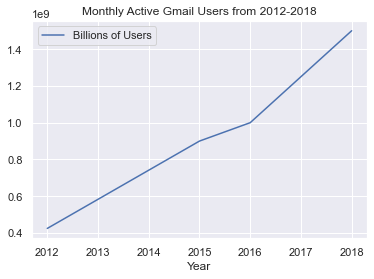

In [57]:
dfSocialMediaEnergy_Gmail_Users = dfSocialMediaEnergy_Google.dropna()

dfSocialMediaEnergy_Gmail_Users_pddf = pd.DataFrame({"Year": dfSocialMediaEnergy_Gmail_Users['Year'], "Entity": dfSocialMediaEnergy_Gmail_Users['Entity'], "Users": dfSocialMediaEnergy_Gmail_Users['Monthly Active Users'], "Energy GWh": dfSocialMediaEnergy_Gmail_Users['Electricity Use in GWh'], "Energy TWh": dfSocialMediaEnergy_Gmail_Users['Electricity Use in TWh']})

ax = dfSocialMediaEnergy_Gmail_Users_pddf.plot(kind='line', x='Year', y='Users', title='Monthly Active Gmail Users from 2012-2018', label='Billions of Users')


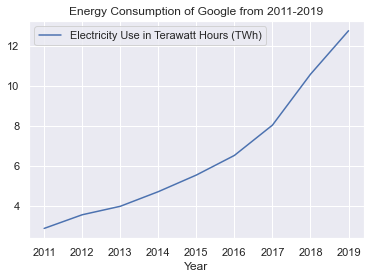

In [58]:
ax = dfSocialMediaEnergy_Google_pddf.plot(kind='line', x='Year', y='Energy TWh', title='Energy Consumption of Google from 2011-2019', label='Electricity Use in Terawatt Hours (TWh)')


In [59]:
dfSocialMediaPosts = pd.read_excel("../../5. Actual Data/Internet Live Stats/postsData.xlsx")

dfSocialMediaPosts_Google = dfSocialMediaPosts.loc[dfSocialMediaPosts['Entity'] == 'Google']


In [60]:
dfSocialMediaPosts_Google_pddf = pd.DataFrame({"Year": dfSocialMediaPosts_Google['Year'], "Entity": dfSocialMediaPosts_Google['Entity'], "Posts": dfSocialMediaPosts_Google['Posts']})

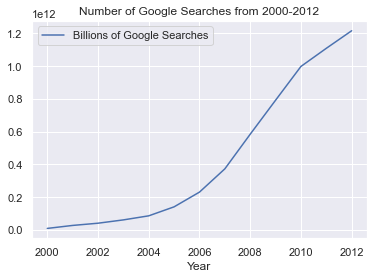

In [61]:
dfSocialMediaPosts_Google_pddf

ax = dfSocialMediaPosts_Google_pddf.plot(kind='line', x='Year', y='Posts', title='Number of Google Searches from 2000-2012', label='Billions of Google Searches')


In [62]:
# Energy use per search = Posts Made / Total Energy Use
Google_Energy_2011 = dfSocialMediaEnergy_Google_pddf.loc[dfSocialMediaEnergy_Google_pddf['Year'] == 2011]['Energy TWh']
Google_Posts_2011 = dfSocialMediaPosts_Google_pddf.loc[dfSocialMediaPosts_Google_pddf['Year'] == 2011]['Posts']

In [63]:
# Calculates the Terawatts used per Google Search in 2011
Google_EneryPerPost_2011_TWh = Google_Energy_2011.iloc[0] / Google_Posts_2011.iloc[0]

# Calculates the Watts used per Google Search in 2011
Google_EneryPerPost_2011_Wh = Google_EneryPerPost_2011_TWh * 1000000000000

In [64]:
Google_EneryPerPost_2011_TWh

2.5823935939326733e-12

In [65]:
Google_EneryPerPost_2011_Wh

2.5823935939326734

In [66]:
dfSocialMediaPosts = pd.read_excel("../../5. Actual Data/Internet Live Stats/postsData.xlsx")

dfSocialMediaPosts_Twitter = dfSocialMediaPosts.loc[dfSocialMediaPosts['Entity'] == 'Twitter']
dfSocialMediaPosts_Twitter_pddf = pd.DataFrame({"Year": dfSocialMediaPosts_Twitter['Year'], "Entity": dfSocialMediaPosts_Twitter['Entity'], "Posts": dfSocialMediaPosts_Twitter['Posts']})


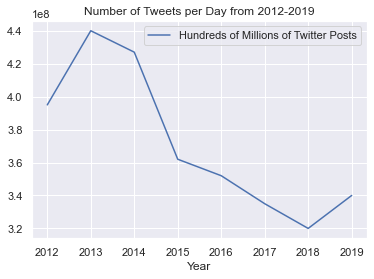

In [67]:
ax = dfSocialMediaPosts_Twitter_pddf.plot(kind='line', x='Year', y='Posts', title='Number of Tweets per Day from 2012-2019', label='Hundreds of Millions of Twitter Posts')


In [68]:
# df with the entity, monthly users and energy use from 2011 - 2019
dfSocialMediaEnergy = pd.read_excel("../../5. Actual Data/Statistica/SocialMediaEnergyUse.xlsx")
# Data on Google comes from Statistica

# Grabs all of the energy Excel data on Twitter and places it into a variable
dfSocialMediaEnergy_Twitter = dfSocialMediaEnergy.loc[dfSocialMediaEnergy['Entity'] == 'Twitter']

# Converts this data into a Pandas DataFrame
dfSocialMediaEnergy_Twitter_pddf = pd.DataFrame({"Year": dfSocialMediaEnergy_Twitter['Year'], "Entity": dfSocialMediaEnergy_Twitter['Entity'], "Users": dfSocialMediaEnergy_Twitter['Monthly Active Users']})

In [69]:
ax = dfSocialMediaEnergy_Twitter_pddf.plot(kind='line', x='Year', y='Users', title='Monthly Active Twitter Users from 2010-2019', label='Hundreds of Millions of Users')


<AxesSubplot:title={'center':'Monthly Active Twitter Users from 2010-2019'}, xlabel='Year'>

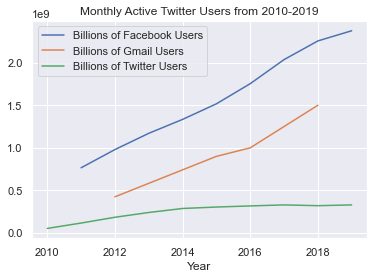

In [70]:
ax = dfSocialMediaEnergy_FB_pddf.plot(kind='line', x='Year', y='Users', title='Monthly Active Users of Facebook from 2011-2019', label='Billions of Facebook Users')
dfSocialMediaEnergy_Gmail_Users_pddf.plot(ax = ax, kind='line', x='Year', y='Users', title='Monthly Active Gmail Users from 2012-2018', label='Billions of Gmail Users')
dfSocialMediaEnergy_Twitter_pddf.plot(ax = ax, kind='line', x='Year', y='Users', title='Monthly Active Twitter Users from 2010-2019', label='Billions of Twitter Users')


In [71]:
# If each Tweet uses 90 joules to send, let's use that for a rough calculation of power usage
# Conversion: 3600 Joules. 1 Watt-hour is equal to 3600 Joules (3.6kJ)
# This means that 90 joules = 0.025 Wh

In [72]:
dfSocialMediaPosts_Twitter_pddf

Year   Entity      Posts
13  2012  Twitter  395000000
14  2013  Twitter  440000000
15  2014  Twitter  427000000
16  2015  Twitter  362000000
17  2016  Twitter  352000000
18  2017  Twitter  335000000
19  2018  Twitter  320000000
20  2019  Twitter  340000000

In [73]:
# Twitter Posts per day * Wh per post * 365 days = Approximate Watt hours of posting
Twitter_2012_Posts_Wh = 395000000 * 0.025 * 365
Twitter_2012_Posts_TWh = Twitter_2012_Posts_Wh * 1e-12

In [74]:
Twitter_2012_Posts_TWh

0.003604375

In [75]:
Twitter_2012_Posts_Wh

3604375000.0

In [76]:
Twitter_Posts_Wh = []
Twitter_Posts_TWh = []
Twitter_Posts_GWh = []

index = 0
for x in range(len(dfSocialMediaPosts_Twitter_pddf)):
    tempPosts = dfSocialMediaPosts_Twitter_pddf.iloc[index]['Posts']
    Twitter_Posts_Wh.append((tempPosts * 0.025 * 365))
    Twitter_Posts_GWh.append((Twitter_Posts_Wh[index] * 1e-9))
    Twitter_Posts_TWh.append((Twitter_Posts_Wh[index] * 1e-12))
    index = index + 1

In [77]:
dfSocialMediaPosts_Twitter_pddf

Year   Entity      Posts
13  2012  Twitter  395000000
14  2013  Twitter  440000000
15  2014  Twitter  427000000
16  2015  Twitter  362000000
17  2016  Twitter  352000000
18  2017  Twitter  335000000
19  2018  Twitter  320000000
20  2019  Twitter  340000000

In [78]:
Twitter_Posts_TWh

[0.003604375,
 0.004015,
 0.003896375,
 0.0033032499999999998,
 0.003212,
 0.003056875,
 0.00292,
 0.0031025]

In [79]:
dfSocialMediaPosts_Twitter_pddf = pd.DataFrame({"Year": dfSocialMediaPosts_Twitter['Year'], "Entity": dfSocialMediaPosts_Twitter['Entity'], "Posts": dfSocialMediaPosts_Twitter['Posts'], "Energy GWh": Twitter_Posts_GWh, "Energy TWh": Twitter_Posts_TWh})


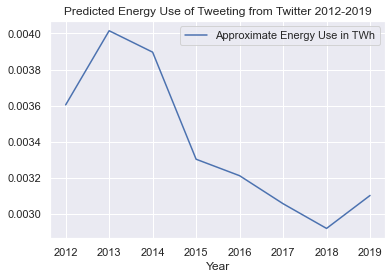

In [80]:
ax = dfSocialMediaPosts_Twitter_pddf.plot(kind='line', x='Year', y='Energy TWh', title='Predicted Energy Use of Tweeting from Twitter 2012-2019', label='Approximate Energy Use in TWh')

<AxesSubplot:title={'center':'Predicted Energy Use of Tweeting from Twitter 2012-2019'}, xlabel='Year'>

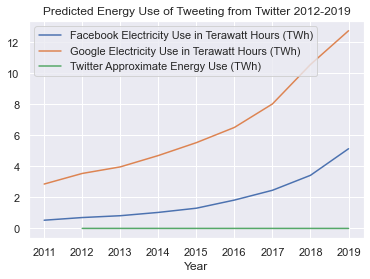

In [81]:
ax = dfSocialMediaEnergy_FB_pddf.plot(kind='line', x='Year', y='Energy TWh', title='Electricity Consumption of Facebook from 2011-2019', label='Facebook Electricity Use in Terawatt Hours (TWh)')
dfSocialMediaEnergy_Google_pddf.plot(ax = ax, kind='line', x='Year', y='Energy TWh', title='Energy Consumption of Google from 2011-2019', label='Google Electricity Use in Terawatt Hours (TWh)')
dfSocialMediaPosts_Twitter_pddf.plot(ax = ax, kind='line', x='Year', y='Energy TWh', title='Predicted Energy Use of Tweeting from Twitter 2012-2019', label='Twitter Approximate Energy Use (TWh)')


In [82]:
# Latest Twitter value - 2019
# Latest Facebook value - 2019
# Latest Google value - 2012

Entities = ['Facebook', 'Google', 'Twitter']

Energy_Use_per_User = []
Energy_Use_per_User.append(dfSocialMediaEnergy_FB_pddf.tail(1)['Energy per user'].iloc[0])

In [83]:
dfSocialMediaEnergy_FB_pddf.tail(1)['Energy per user'].iloc[0]

2164.2105263157896

In [84]:
Energy_Use_per_User

[2164.2105263157896]

In [85]:
# Energy use per search = Posts Made / Total Energy Use
Google_Energy_2012 = dfSocialMediaEnergy_Google_pddf.loc[dfSocialMediaEnergy_Google_pddf['Year'] == 2012]['Energy TWh']
Google_Posts_2012 = dfSocialMediaPosts_Google_pddf.loc[dfSocialMediaPosts_Google_pddf['Year'] == 2012]['Posts']

# Calculates the Terawatts used per Google Search in 2011
Google_EneryPerPost_2012_TWh = Google_Energy_2012.iloc[0] / Google_Posts_2012.iloc[0]

# Calculates the Watts used per Google Search in 2011
Google_EneryPerPost_2012_Wh = Google_EneryPerPost_2012_TWh * 1000000000000

In [86]:
Energy_Use_per_User.append(Google_EneryPerPost_2012_Wh)

In [87]:
Energy_Use_per_User

[2164.2105263157896, 2.916045112788136]

In [88]:
# Sets the value to the total energy use from Tweeting (TWh) in 2019
Twitter_Energy_2019_TWh = dfSocialMediaPosts_Twitter_pddf.loc[dfSocialMediaPosts_Twitter_pddf['Year'] == 2019]['Energy TWh']

Twitter_Energy_2019_Wh = Twitter_Energy_2019_TWh * 1e+12

In [89]:
Twitter_Users_2019 = dfSocialMediaEnergy_Twitter_pddf.loc[dfSocialMediaEnergy_Twitter_pddf['Year'] == 2019]['Users']

Twitter_EnergyPerUser_2019_Wh = Twitter_Energy_2019_Wh.iloc[0] / Twitter_Users_2019.iloc[0]

In [90]:
Twitter_Energy_2019_Wh.iloc[0]

3102500000.0

In [91]:
Twitter_EnergyPerUser_2019_Wh

9.401515151515152

In [92]:
Energy_Use_per_User.append(Twitter_EnergyPerUser_2019_Wh)

In [93]:
Energy_Use_per_User

[2164.2105263157896, 2.916045112788136, 9.401515151515152]

In [94]:
# dfSocialMediaPosts_Twitter_pddf = pd.DataFrame({"Year": dfSocialMediaPosts_Twitter['Year'], "Entity": dfSocialMediaPosts_Twitter['Entity'], "Posts": dfSocialMediaPosts_Twitter['Posts'], "Energy GWh": Twitter_Posts_GWh, "Energy TWh": Twitter_Posts_TWh})


EnergyPerUser_pddf = pd.DataFrame({"Entity": Entities, "Energy per User": Energy_Use_per_User})

In [95]:
EnergyPerUser_pddf

Entity  Energy per User
0  Facebook      2164.210526
1    Google         2.916045
2   Twitter         9.401515

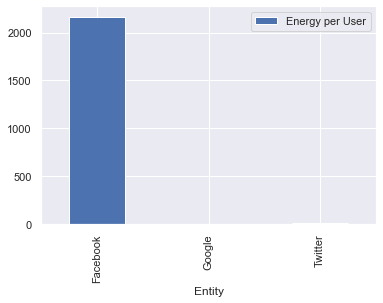

In [96]:
# ax = df_group_by_country_avg_pddf.sort_values(by=['Energy use'], ascending=False).plot(kind='bar', x='Country', y='Energy use')
ax = EnergyPerUser_pddf.plot(kind='bar', x='Entity', y='Energy per User')

# Looks like this because Facebook is the total energy of a user. Google and Twitter is the energy per post

In [97]:
# Date is 10/03/2022
# Time to calculate the exact environmental impact

# Next step, Facebook:
# Calculate the CO2 released each year assuming the same efficency as the US
# Calculate the number of UK homes that could be powered
# Calculate how many lightbulbs can be powered

dfSocialMediaEnergy_FB_pddf

# This is how many grams of CO2 are released per kWh produced in the US
US_gramsCO2_perkWh = 385.5535

In [124]:
kWh_array = []
CO2_grams_array = []
UKhouseholds_array = []
CO2_metricTons_array = []

# Calculates the CO2 released in grams (based on the US conversion rate)
# Calculates the number of UK households that could be powered with that energy
i = 0
for x in range(len(dfSocialMediaEnergy_FB_pddf)):
    tempRow = dfSocialMediaEnergy_FB_pddf.iloc[i]
    i = i + 1
    # To add: CO2_released, UK households
    tempkWh = tempRow['Energy GWh'] * 1000000
    tempCO2_grams = US_gramsCO2_perkWh * tempkWh
    temp_UKhouseholds = tempkWh / 2900
    temp_CO2_metricTons = tempCO2_grams * 1e-6
    
    kWh_array.append(tempkWh)
    CO2_grams_array.append(tempCO2_grams)
    UKhouseholds_array.append(temp_UKhouseholds)
    CO2_metricTons_array.append(temp_CO2_metricTons)
    
    
    # print(tempRow)

# Places the new calulations into the Pandas dataframe
temp = dfSocialMediaEnergy_FB_pddf.copy()
dfSocialMediaEnergy_FB_pddf = pd.DataFrame({"Year": temp['Year'], "Entity": temp['Entity'], "Users": temp['Users'], "Energy GWh": temp['Energy GWh'], "Energy TWh": temp['Energy TWh'], "Energy kWh": kWh_array, "CO2 grams": CO2_grams_array, "CO2 metric tons": CO2_metricTons_array, "UK households": UKhouseholds_array})

In [125]:
dfSocialMediaEnergy_FB_pddf

Year    Entity         Users  Energy GWh  Energy TWh    Energy kWh  \
0  2011  Facebook  7.660000e+08       532.0       0.532  5.320000e+08   
1  2012  Facebook  9.797500e+08       704.0       0.704  7.040000e+08   
2  2013  Facebook  1.170500e+09       822.0       0.822  8.220000e+08   
3  2014  Facebook  1.334000e+09      1035.0       1.035  1.035000e+09   
4  2015  Facebook  1.516750e+09      1306.0       1.306  1.306000e+09   
5  2016  Facebook  1.753500e+09      1830.0       1.830  1.830000e+09   
6  2017  Facebook  2.035750e+09      2462.0       2.462  2.462000e+09   
7  2018  Facebook  2.255250e+09      3427.0       3.427  3.427000e+09   
8  2019  Facebook  2.375000e+09      5140.0       5.140  5.140000e+09   

      CO2 grams  CO2 metric tons  UK households  
0  2.051145e+11     2.051145e+05   1.834483e+05  
1  2.714297e+11     2.714297e+05   2.427586e+05  
2  3.169250e+11     3.169250e+05   2.834483e+05  
3  3.990479e+11     3.990479e+05   3.568966e+05  
4  5.035329e+11     5.035329e+05   4.503448e+05  
5  7.055629e+11     7.055629e+05   6.310345e+05  
6  9.492327e+11     9.492327e+05   8.489655e+05  
7  1.321292e+12     1.321292e+06   1.181724e+06  
8  1.981745e+12     1.981745e+06   1.772414e+06

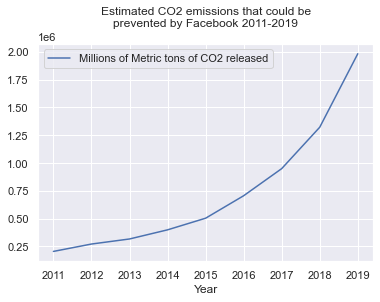

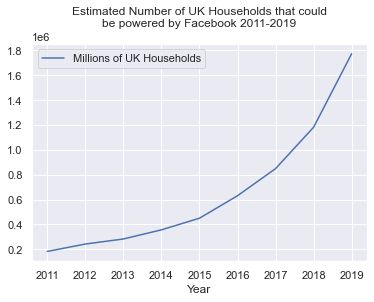

In [135]:
ax = dfSocialMediaEnergy_FB_pddf.plot(kind='line', x='Year', y='CO2 metric tons', title='Estimated CO2 emissions that could be\nprevented by Facebook 2011-2019\n', label='Millions of Metric tons of CO2 released')
ax = dfSocialMediaEnergy_FB_pddf.plot(kind='line', x='Year', y='UK households', title='Estimated Number of UK Households that could\nbe powered by Facebook 2011-2019\n', label='Millions of UK Households')

In [137]:
dfSocialMediaEnergy_Google_pddf

Year  Entity         Users  Energy GWh  Energy TWh
9   2011  Google           NaN      2864.0       2.864
10  2012  Google  4.250000e+08      3547.0       3.547
11  2013  Google           NaN      3970.0       3.970
12  2014  Google           NaN      4702.0       4.702
13  2015  Google  9.000000e+08      5533.0       5.533
14  2016  Google  1.000000e+09      6514.0       6.514
15  2017  Google           NaN      8029.0       8.029
16  2018  Google  1.500000e+09     10573.0      10.573
17  2019  Google           NaN     12749.0      12.749

In [138]:
kWh_array = []
CO2_grams_array = []
UKhouseholds_array = []
CO2_metricTons_array = []

# Calculates the CO2 released in grams (based on the US conversion rate)
# Calculates the number of UK households that could be powered with that energy
i = 0
for x in range(len(dfSocialMediaEnergy_Google_pddf)):
    tempRow = dfSocialMediaEnergy_Google_pddf.iloc[i]
    i = i + 1
    # To add: CO2_released, UK households
    tempkWh = tempRow['Energy GWh'] * 1000000
    tempCO2_grams = US_gramsCO2_perkWh * tempkWh
    temp_UKhouseholds = tempkWh / 2900
    temp_CO2_metricTons = tempCO2_grams * 1e-6
    
    kWh_array.append(tempkWh)
    CO2_grams_array.append(tempCO2_grams)
    UKhouseholds_array.append(temp_UKhouseholds)
    CO2_metricTons_array.append(temp_CO2_metricTons)
    
    
    # print(tempRow)

# Places the new calulations into the Pandas dataframe
temp = dfSocialMediaEnergy_Google_pddf.copy()
dfSocialMediaEnergy_Google_pddf = pd.DataFrame({"Year": temp['Year'], "Entity": temp['Entity'], "Users": temp['Users'], "Energy GWh": temp['Energy GWh'], "Energy TWh": temp['Energy TWh'], "Energy kWh": kWh_array, "CO2 grams": CO2_grams_array, "CO2 metric tons": CO2_metricTons_array, "UK households": UKhouseholds_array})

In [139]:
dfSocialMediaEnergy_Google_pddf

Year  Entity         Users  Energy GWh  Energy TWh    Energy kWh  \
9   2011  Google           NaN      2864.0       2.864  2.864000e+09   
10  2012  Google  4.250000e+08      3547.0       3.547  3.547000e+09   
11  2013  Google           NaN      3970.0       3.970  3.970000e+09   
12  2014  Google           NaN      4702.0       4.702  4.702000e+09   
13  2015  Google  9.000000e+08      5533.0       5.533  5.533000e+09   
14  2016  Google  1.000000e+09      6514.0       6.514  6.514000e+09   
15  2017  Google           NaN      8029.0       8.029  8.029000e+09   
16  2018  Google  1.500000e+09     10573.0      10.573  1.057300e+10   
17  2019  Google           NaN     12749.0      12.749  1.274900e+10   

       CO2 grams  CO2 metric tons  UK households  
9   1.104225e+12     1.104225e+06   9.875862e+05  
10  1.367558e+12     1.367558e+06   1.223103e+06  
11  1.530647e+12     1.530647e+06   1.368966e+06  
12  1.812873e+12     1.812873e+06   1.621379e+06  
13  2.133268e+12     2.133268e+06   1.907931e+06  
14  2.511495e+12     2.511495e+06   2.246207e+06  
15  3.095609e+12     3.095609e+06   2.768621e+06  
16  4.076457e+12     4.076457e+06   3.645862e+06  
17  4.915422e+12     4.915422e+06   4.396207e+06

In [141]:
ax = dfSocialMediaEnergy_Google_pddf.plot(kind='line', x='Year', y='CO2 metric tons', title='Estimated CO2 emissions of Google 2011-2019\n', label='Millions of Metric tons of CO2 released')
ax = dfSocialMediaEnergy_Google_pddf.plot(kind='line', x='Year', y='UK households', title='Estimated Number of UK Households that could\nbe powered by Google 2011-2019\n', label='Millions of UK Households')

In [143]:
dfSocialMediaPosts_Twitter_pddf

Year   Entity      Posts  Energy GWh  Energy TWh
13  2012  Twitter  395000000    3.604375    0.003604
14  2013  Twitter  440000000    4.015000    0.004015
15  2014  Twitter  427000000    3.896375    0.003896
16  2015  Twitter  362000000    3.303250    0.003303
17  2016  Twitter  352000000    3.212000    0.003212
18  2017  Twitter  335000000    3.056875    0.003057
19  2018  Twitter  320000000    2.920000    0.002920
20  2019  Twitter  340000000    3.102500    0.003102

In [148]:
kWh_array = []
CO2_grams_array = []
UKhouseholds_array = []
CO2_metricTons_array = []

# Calculates the CO2 released in grams (based on the US conversion rate)
# Calculates the number of UK households that could be powered with that energy
i = 0
for x in range(len(dfSocialMediaPosts_Twitter_pddf)):
    tempRow = dfSocialMediaPosts_Twitter_pddf.iloc[i]
    i = i + 1
    # To add: CO2_released, UK households
    tempkWh = tempRow['Energy GWh'] * 1000000
    tempCO2_grams = US_gramsCO2_perkWh * tempkWh
    temp_UKhouseholds = tempkWh / 2900
    temp_CO2_metricTons = tempCO2_grams * 1e-6
    
    kWh_array.append(tempkWh)
    CO2_grams_array.append(tempCO2_grams)
    UKhouseholds_array.append(temp_UKhouseholds)
    CO2_metricTons_array.append(temp_CO2_metricTons)
    
    
    # print(tempRow)

# Places the new calulations into the Pandas dataframe
temp = dfSocialMediaPosts_Twitter_pddf.copy()
dfSocialMediaPosts_Twitter_pddf = pd.DataFrame({"Year": temp['Year'], "Entity": temp['Entity'], "Posts": temp['Posts'], "Energy GWh": temp['Energy GWh'], "Energy TWh": temp['Energy TWh'], "Energy kWh": kWh_array, "CO2 grams": CO2_grams_array, "CO2 metric tons": CO2_metricTons_array, "UK households": UKhouseholds_array})

In [149]:
dfSocialMediaPosts_Twitter_pddf

Year   Entity      Posts  Energy GWh  Energy TWh  Energy kWh  \
13  2012  Twitter  395000000    3.604375    0.003604   3604375.0   
14  2013  Twitter  440000000    4.015000    0.004015   4015000.0   
15  2014  Twitter  427000000    3.896375    0.003896   3896375.0   
16  2015  Twitter  362000000    3.303250    0.003303   3303250.0   
17  2016  Twitter  352000000    3.212000    0.003212   3212000.0   
18  2017  Twitter  335000000    3.056875    0.003057   3056875.0   
19  2018  Twitter  320000000    2.920000    0.002920   2920000.0   
20  2019  Twitter  340000000    3.102500    0.003102   3102500.0   

       CO2 grams  CO2 metric tons  UK households  
13  1.389679e+09      1389.679397    1242.887931  
14  1.547997e+09      1547.997303    1384.482759  
15  1.502261e+09      1502.261019    1343.577586  
16  1.273580e+09      1273.579599    1139.051724  
17  1.238398e+09      1238.397842    1107.586207  
18  1.178589e+09      1178.588855    1054.094828  
19  1.125816e+09      1125.816220    1006.896552  
20  1.196180e+09      1196.179734    1069.827586

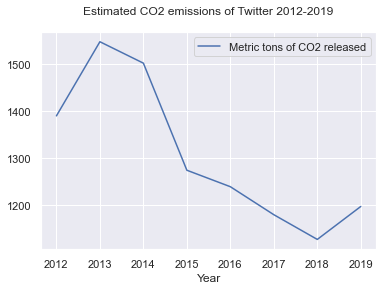

In [152]:
ax = dfSocialMediaPosts_Twitter_pddf.plot(kind='line', x='Year', y='CO2 metric tons', title='Estimated CO2 emissions of Twitter 2012-2019\n', label='Metric tons of CO2 released')
ax = dfSocialMediaPosts_Twitter_pddf.plot(kind='line', x='Year', y='UK households', title='Estimated Number of UK Households that could\nbe powered by Twitter 2012-2019\n', label='UK Households')